# Simplex Method Example

Consider the following investment projects where, for each project, you are given its net present value (NPV) as well as the cash outflow required during each year (in million dollars).
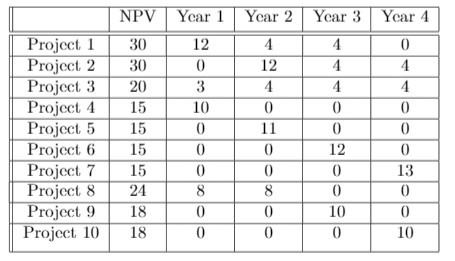
Suppose  you  have  18  million  dollars  available  for  investment  each  year,  and partial investment is allowed.

Formulate an integer linear program to determine the best investment
plan and solve with PuLP.

In [1]:
import sys
!{sys.executable} -m pip install pulp

In [2]:
from pulp import *

We create the model with the specified associated parameters.

In [3]:
model = LpProblem(name="Investment_Projects", sense=LpMaximize)

We initialise the decision variables

In [4]:
x = {i: LpVariable(name=f"x{i}",lowBound=0) for i in range(1, 11)}

We add in the constraints

In [12]:
model += (12 * x[1] + 3 * x[3] + 10 * x[4] + 8 * x[8] <= 18)
model += (4 * x[1] + 12 * x[2] + 4 * x[3] + 11 * x[5] + 8 * x[8] <= 18)
model += (4 * x[1] + 4 * x[2] + 4 * x[3] + 12 * x[6] + 10 * x[9] <= 18)
model += (4 * x[2] + 4 * x[3] + 13 * x[7] + 10 * x[10] <= 18)

...and the objective function

In [6]:
model += 30 * x[1] + 30 * x[2] + 20 * x[3] + 15 * x[4] + 15 * x[5] + 15 * x[6] + 15 * x[7] + 24 * x[8] + 18 * x[9] + 18 * x[10]

Now we can find the solution of the problem

In [7]:
status = model.solve()

In [8]:
print(f"status: {LpStatus[model.status]}")

print(f"objective: {model.objective.value()}")

for var in x.values():
    print(f"{var.name}: {var.value()}")

status: Optimal
objective: 118.80000000000001
x1: 0.0
x2: 0.0
x3: 0.0
x4: 0.0
x5: 0.0
x6: 0.0
x7: 0.0
x8: 2.25
x9: 1.8
x10: 1.8


So we find an optimal solution of $x_8$=2.25,$x_9$=1.8,$x_10$=1.8 with z=118.8
i.e  the investor should invest 2.25M dollars in project 8, 1.8M dollars in project 9 and 1.8M dollars in project 10, which will yield an optimal net present value of 118.8M dollars subject to the budget constraints